<a href="https://colab.research.google.com/github/shirleyzz/zz/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Load the training and test data using Keras
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import keras

In [0]:
(x_train_origin, y_train_origin),(x_test_origin, y_test_origin) = mnist.load_data()
x_train, x_test = x_train_origin / 255.0, x_test_origin / 255.0

In [0]:
func = lambda x: 1 if x == 1 else 0
#Train 10 classifiers that perform binary classification
x_train = x_train_origin.reshape((60000, 28 * 28))
x_train = x_train_origin.astype('float32') / 255

x_test = x_test_origin.reshape((10000, 28 * 28))
x_test = x_test_origin.astype('float32') / 255

In [0]:
y_train = np.array([func(y) for y in y_train_origin])
y_test = np.array([func(y) for y in y_test_origin])

In [0]:
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T

y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.


In [0]:
test_images.shape

(10000, 784)

In [0]:
#convert to labels


In [0]:
train_labels.shape

(60000, 10)

In [0]:
test_labels.shape

(10000, 10)

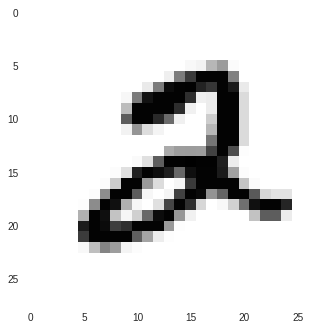

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images_original[5])
plt.grid(None)
plt.show()

In [0]:
#@title
class Perceptron(object):
  """
  define hyperparameter:
  learning_rate: 0-1, float
  n_iter: int, number of iterations
  define attributes:
  w:weight
  errors:
  """
  def __init__(self,learning_rate=0.01,n_iter=10, epochs=10):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.epochs = epochs
  def fit(self,X,y):
    self.w = np.zeros(1+X.shape[1])
    self.errors = []
    for i in range(self.n_iter):
      error = 0
      new_weight = self.stochas_gradient_descent(X,y)
#       for xi, target in zip(X,y):
#         self.w[1:] = stochas_gradient_descent(X,y)
#         update = self.learning_rate * (target - self.predict(xi))
#         self.w[1:] += update*xi
#         self.w[0] += update
#         error += int(update != 0.0)
      
      self.errors.append(error)
    return self
  def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s
  def stochas_gradient_descent(self,X,y):
    weight = self.w
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    weight_path_mgd = []
    batch_size = 4
    weight_path_mgd.append(self.w)
    for epoch in range(self.epochs):
      shuffled_indices = np.random.permutation(m)
      X_b_shuffled = X_b[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 2/batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
    return weight_path_mgd
  def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)                                       
    cost = -1./m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1-A)) 

   
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = 1/m*np.sum(A-Y)
  
    assert(dw.shape == w.shape)
    assert(db.dtype == float)

    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
  
  def predict(self,X):
    
    return np.argmax(sigmoid(X) < 0.5, 0, 1)

In [0]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))  
    return s

In [0]:
def initialize_params_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    """
   
    w = np.zeros((dim,1))
    b = 0
  
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [0]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    print(A.shape)
    print(Y.shape)
    loss = (1/m) * np.sum(np.square(Y - A))
    #loss = -1./m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1-A)) 
    
    dL = 2*(A - Y)
    dA = A * (1 - A) * dL
    
    #dw = (1/m)*np.dot(X,dA.T)
    #db = 1/m*np.sum(dA)
    
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    #cost = np.squeeze(cost)
    #assert(cost.shape == ())
    grads = {"dw": dw,
             "db": db}
    return grads, loss

In [0]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iters, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iters):
        # Cost and gradient calculation (~1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)                                 
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update rule 
        w = w - learning_rate *  dw    # Update the weight with the gradient descent rule. Need to broadcast
        b = b - learning_rate *  db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training examples
        if print_cost and (i % 100 == 0 or i == num_iters - 1):
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
  
    return params, grads, costs

In [0]:
print(train_images.shape)
train_labels.shape

(60000, 784)


(60000, 10)

In [0]:
#  predict
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute the prediction vector "A" containing the probabilities
    A = sigmoid(np.dot(w.T, X) + b)
       
    for i in range(A.shape[0]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        if A[0][i] <= 0.5:
            Y_pred[0, i] = 0
        else:
            Y_pred[0, i] = 1
    assert(Y_pred.shape == (1, m))
    
    return Y_pred

In [0]:
# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iters=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iters -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros 
    w, b = initialize_params_with_zeros(X_train.shape[0])                          

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iters, learning_rate, print_cost=False)     
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_pred_test = predict(w, b, X_test)
    Y_pred_train = predict(w, b, X_train)

    # Print train/test Errors
    print("")
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
    repr('train accuracy')


    
    d = {"costs": costs,
         "Y_pred_test": Y_pred_test, 
         "Y_pred_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iters": num_iters}
    
    return d

In [0]:
d = model(x_train, y_train, x_test, y_test, num_iters=10, learning_rate=0.5, print_cost=True)

(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)
(1, 60000)

train accuracy: 88.76333333333334 %
test accuracy: 88.65 %
